# Descriptors and Regression

##### Nikolas Fechner
##### Novartis Institutes for BioMedical Research, Novartis Campus, 4002 Basel, Switzerland

In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 1.8 MB/s eta 0:00:0000:0100:010m


In [42]:
%pylab inline
import pandas as pd
import sklearn
from rdkit import rdBase
import matplotlib as mpl
import numpy as np
import seaborn as sns
print('RDKit version: ',rdBase.rdkitVersion)
print('Pandas version:', pd.__version__)
print('Scikit-Learn version:', sklearn.__version__)
print('Numpy version:', np.__version__)
print('MatplotLib version:', mpl.__version__)
print('Seaborn version',sns.__version__)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
RDKit version:  2023.09.4
Pandas version: 2.0.3
Scikit-Learn version: 1.3.2
Numpy version: 1.24.3
MatplotLib version: 3.7.3
Seaborn version 0.13.0


/Users/jalal/anaconda3/envs/workspace/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [4]:
from rdkit.Chem.Draw import IPythonConsole

## Data

Publicly available quantitive solubility data from "Estimation of Aqueous Solubility for a Diverse Set of Organic Compounds Based on Molecular Topology", Jarmo Huuskonen, J. Chem. Inf. Comput. Sci., 2000, 40, 773-777

Training data set obtained from cheminformatics.org: http://cheminformatics.org/datasets/huuskonen/train.smi

Test set obtained from cheminformatics.org: http://cheminformatics.org/datasets/huuskonen/test1.smi

In [120]:
trainSet = pd.read_csv('cb2_all_descriptors.csv',sep=',')

In [121]:
trainSet.head()

,ID,Smiles,Target Name,Ki,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,...,QSOgrant,_ChargeC,_HydrophobicityC,_NormalizedVDWVC,_PolarityC,_PolarizabilityC,_SecondaryStrC,_SolventAccessibilityC,taugrant,tausw
0,CHEMBL600801,CCCCCCC(C)(C)c1cc(C#N)c2c(c1)OC(C)(C)[C@@H]1CC...,Cannabinoid CB2 receptor,5.3,379.287515,379.588,2.0,0.0,6.0,0.0,...,0.02,37.309048,36.188667,35.261905,36.350476,35.568905,35.765381,36.239905,103.7752,103.7752
1,CHEMBL75571,COc1ccc2c(c1)c(CC(=O)N1CCOCC1)c(C)n2C(=O)c1ccc...,Cannabinoid CB2 receptor,354.0,426.134635,426.900,6.0,0.0,4.0,0.0,...,0.02,37.309048,36.188667,35.261905,36.350476,35.568905,35.765381,36.239905,103.7752,103.7752
2,CHEMBL201582,CC(C)c1nc2c(-c3ccc(Cl)cc3)n(-c3ccccc3Cl)nc2c(=...,Cannabinoid CB2 receptor,10000.0,480.073151,481.305,5.0,0.0,4.0,0.0,...,0.02,37.309048,36.188667,35.261905,36.350476,35.568905,35.765381,36.239905,103.7752,103.7752
3,CHEMBL272944,Cc1c(C(=O)N2CCCCCC2)oc2ccc(S(=O)(=O)N3CC(C)CC(...,Cannabinoid CB2 receptor,4900.0,432.208279,432.586,6.0,0.0,3.0,0.0,...,0.02,37.309048,36.188667,35.261905,36.350476,35.568905,35.765381,36.239905,103.7752,103.7752
4,CHEMBL404574,Cc1c(C(=O)NC2CCCCC2)oc2ccc(S(=O)(=O)N3CC(C)CC(...,Cannabinoid CB2 receptor,17400.0,432.208279,432.586,6.0,1.0,4.0,1.0,...,0.02,37.309048,36.188667,35.261905,36.350476,35.568905,35.765381,36.239905,103.7752,103.7752


In [122]:
filtered_df = trainSet[['ID', 'Ki', 'Smiles']]


In [123]:
trainSet=filtered_df

In [124]:
trainSet

,ID,Ki,Smiles
0,CHEMBL600801,5.300,CCCCCCC(C)(C)c1cc(C#N)c2c(c1)OC(C)(C)[C@@H]1CC...
1,CHEMBL75571,354.000,COc1ccc2c(c1)c(CC(=O)N1CCOCC1)c(C)n2C(=O)c1ccc...
2,CHEMBL201582,10000.000,CC(C)c1nc2c(-c3ccc(Cl)cc3)n(-c3ccccc3Cl)nc2c(=...
3,CHEMBL272944,4900.000,Cc1c(C(=O)N2CCCCCC2)oc2ccc(S(=O)(=O)N3CC(C)CC(...
4,CHEMBL404574,17400.000,Cc1c(C(=O)NC2CCCCC2)oc2ccc(S(=O)(=O)N3CC(C)CC(...
...,...,...,...
5943,CHEMBL5178204,794.330,CCCCCn1cc(C(=O)N[C@@H](Cc2ccccc2)C(N)=O)c2cccnc21
5944,CHEMBL5169682,0.912,CCCCn1nc(C(=O)N[C@H](C(N)=O)C(C)(C)C)c2ccccc21
5945,CHEMBL5202843,1.320,CCCCn1cc(C(=O)N[C@H](C(N)=O)C(C)(C)C)c2ccccc21
5946,CHEMBL5182619,0.900,COc1cccc2c(=O)c(C(=O)NC34CC5CC(CC(C5)C3)C4)cn(...


In [125]:
from rdkit import Chem
from rdkit.Chem import PandasTools

In [126]:
trainSet.dropna(axis='index',inplace=True)

In [127]:
from rdkit.Chem import PandasTools

# Assuming trainSet is your DataFrame and it has a column 'Smiles'
PandasTools.AddMoleculeColumnToFrame(frame=trainSet, smilesCol='Smiles', molCol='Molecule')

In [128]:
X = trainSet

,ID,Ki,Smiles,Molecule
0,CHEMBL600801,5.300,CCCCCCC(C)(C)c1cc(C#N)c2c(c1)OC(C)(C)[C@@H]1CC...,
1,CHEMBL75571,354.000,COc1ccc2c(c1)c(CC(=O)N1CCOCC1)c(C)n2C(=O)c1ccc...,
2,CHEMBL201582,10000.000,CC(C)c1nc2c(-c3ccc(Cl)cc3)n(-c3ccccc3Cl)nc2c(=...,
3,CHEMBL272944,4900.000,Cc1c(C(=O)N2CCCCCC2)oc2ccc(S(=O)(=O)N3CC(C)CC(...,
4,CHEMBL404574,17400.000,Cc1c(C(=O)NC2CCCCC2)oc2ccc(S(=O)(=O)N3CC(C)CC(...,
...,...,...,...,...
5943,CHEMBL5178204,794.330,CCCCCn1cc(C(=O)N[C@@H](Cc2ccccc2)C(N)=O)c2cccnc21,
5944,CHEMBL5169682,0.912,CCCCn1nc(C(=O)N[C@H](C(N)=O)C(C)(C)C)c2ccccc21,
5945,CHEMBL5202843,1.320,CCCCn1cc(C(=O)N[C@H](C(N)=O)C(C)(C)C)c2ccccc21,
5946,CHEMBL5182619,0.900,COc1cccc2c(=O)c(C(=O)NC34CC5CC(CC(C5)C3)C4)cn(...,

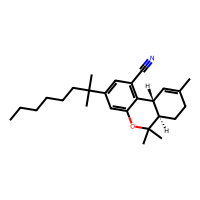
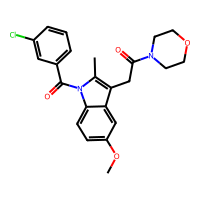
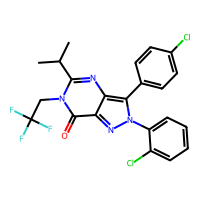
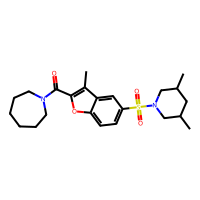
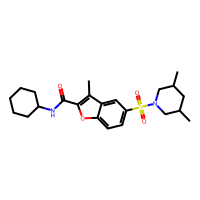
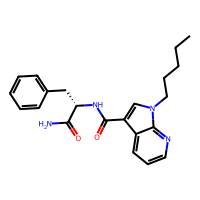
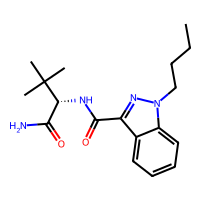
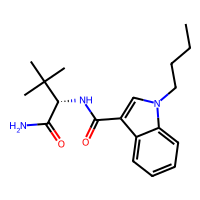
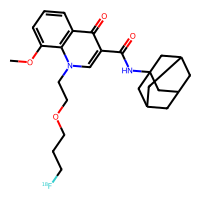
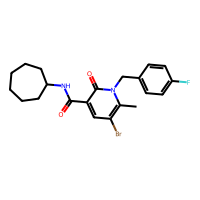

In [129]:
trainSet

In [130]:
trainSet = trainSet[trainSet['Ki'] <= 100]


/var/folders/s6/r_pqgsz17gl5gwn6hkpp23k40000gn/T/ipykernel_96501/1699834641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Ki'] = pd.to_numeric(trainSet['Ki'], errors='coerce')


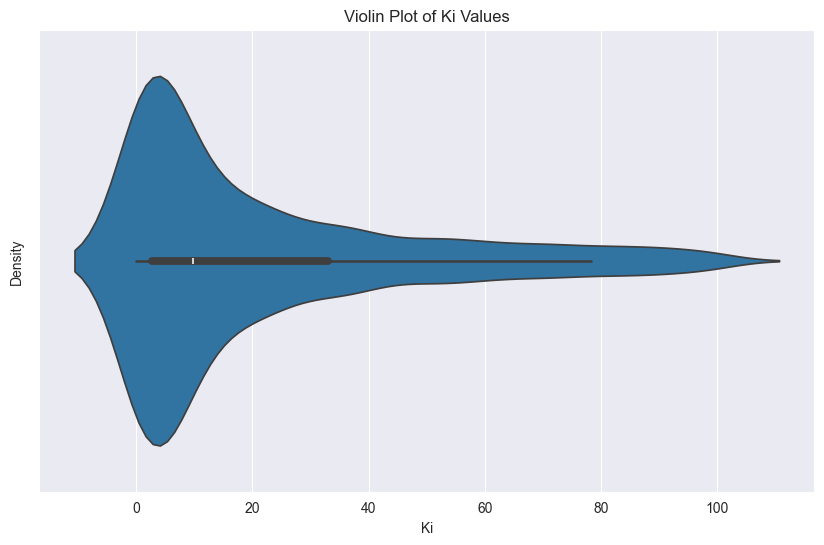

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

trainSet['Ki'] = pd.to_numeric(trainSet['Ki'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.violinplot(x=trainSet['Ki'])

plt.title('Violin Plot of Ki Values')
plt.xlabel('Ki')
plt.ylabel('Density')

plt.show()

In [132]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
descriptors = list(np.array(Descriptors._descList)[:,0])
print(np.array(Descriptors._descList)[:,0])

['MaxAbsEStateIndex' 'MaxEStateIndex' 'MinAbsEStateIndex' 'MinEStateIndex'
 'qed' 'SPS' 'MolWt' 'HeavyAtomMolWt' 'ExactMolWt' 'NumValenceElectrons'
 'NumRadicalElectrons' 'MaxPartialCharge' 'MinPartialCharge'
 'MaxAbsPartialCharge' 'MinAbsPartialCharge' 'FpDensityMorgan1'
 'FpDensityMorgan2' 'FpDensityMorgan3' 'BCUT2D_MWHI' 'BCUT2D_MWLOW'
 'BCUT2D_CHGHI' 'BCUT2D_CHGLO' 'BCUT2D_LOGPHI' 'BCUT2D_LOGPLOW'
 'BCUT2D_MRHI' 'BCUT2D_MRLOW' 'AvgIpc' 'BalabanJ' 'BertzCT' 'Chi0' 'Chi0n'
 'Chi0v' 'Chi1' 'Chi1n' 'Chi1v' 'Chi2n' 'Chi2v' 'Chi3n' 'Chi3v' 'Chi4n'
 'Chi4v' 'HallKierAlpha' 'Ipc' 'Kappa1' 'Kappa2' 'Kappa3' 'LabuteASA'
 'PEOE_VSA1' 'PEOE_VSA10' 'PEOE_VSA11' 'PEOE_VSA12' 'PEOE_VSA13'
 'PEOE_VSA14' 'PEOE_VSA2' 'PEOE_VSA3' 'PEOE_VSA4' 'PEOE_VSA5' 'PEOE_VSA6'
 'PEOE_VSA7' 'PEOE_VSA8' 'PEOE_VSA9' 'SMR_VSA1' 'SMR_VSA10' 'SMR_VSA2'
 'SMR_VSA3' 'SMR_VSA4' 'SMR_VSA5' 'SMR_VSA6' 'SMR_VSA7' 'SMR_VSA8'
 'SMR_VSA9' 'SlogP_VSA1' 'SlogP_VSA10' 'SlogP_VSA11' 'SlogP_VSA12'
 'SlogP_VSA2' 'SlogP_VSA3' 'SlogP_

In [133]:
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors)

def computeDescriptors(mol, calculator):
    res = np.array(calculator.CalcDescriptors(mol))
    if not np.all(np.isfinite(res)):
        return None
    return res

In [134]:

trainSet['Descriptors'] = trainSet['Molecule'].map(lambda x: computeDescriptors(x, calculator))

trainSet = trainSet.loc[trainSet['Descriptors'].notnull()]
trainSet.describe()

/var/folders/s6/r_pqgsz17gl5gwn6hkpp23k40000gn/T/ipykernel_96501/1208049457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Descriptors'] = trainSet['Molecule'].map(lambda x: computeDescriptors(x, calculator))


,Ki
count,2747.000000
mean,21.869655
std,25.926110
min,0.010000
25%,2.700000
50%,9.800000
75%,33.000000
max,100.000000


In [135]:
trainSet.head()

,ID,Ki,Smiles,Molecule,Descriptors
0,CHEMBL600801,5.3000,CCCCCCC(C)(C)c1cc(C#N)c2c(c1)OC(C)(C)[C@@H]1CC...,<rdkit.Chem.rdchem.Mol object at 0x2acb94d60>,"[9.989850230036918, 9.989850230036918, 0.05262..."
5,CHEMBL1209710,0.3981,C[C@H]1CN(C(=O)c2cn3c4c(cccc24)OC[C@H]3C2CCCCC...,<rdkit.Chem.rdchem.Mol object at 0x2acb94970>,"[13.463115866717057, 13.463115866717057, 0.171..."
10,CHEMBL240314,7.4600,C[C@H](CO)NC(=O)CCC/C=C\C/C=C\CCOc1cccc(C(C)(C...,<rdkit.Chem.rdchem.Mol object at 0x2acb94c80>,"[11.600388292502942, 11.600388292502942, 0.003..."
13,CHEMBL1644675,42.0000,FC(F)(F)c1cccc(-c2c[nH]c(-c3cccc(CN4CCOCC4)c3)...,<rdkit.Chem.rdchem.Mol object at 0x2acb94f20>,"[12.950623881473959, 12.950623881473959, 0.432..."
18,CHEMBL465,32.2000,CCCCCc1cc(O)c2c(c1)OC(C)(C)[C@@H]1CCC(C)=C[C@@...,<rdkit.Chem.rdchem.Mol object at 0x2acb945f0>,"[10.679840718694887, 10.679840718694887, 0.177..."


In [139]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = np.stack(trainSet['Descriptors'].values)
y = trainSet['Ki'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_reg = LinearRegression()
linear_reg.fit(X_scaled, y)
linear_pred = linear_reg.predict(X_scaled)

simple_tree = DecisionTreeRegressor()
simple_tree.fit(X_scaled, y)
tree_pred = simple_tree.predict(X_scaled)

elastic_net = ElasticNet()
elastic_net.fit(X_scaled, y)
custom_elastic_pred = elastic_net.predict(X_scaled)

for ax in axes:
    ax.set_aspect('equal')
    ax.set_xlim(-12, 2)
    ax.set_ylim(-12, 2)

plt.tight_layout()
plt.show()

print('Coefficient of determination R^2 (LR): ', linear_reg.score(X_scaled, y))
print('MSE (LR): ', mean_squared_error(y, linear_pred))
print('Coefficient of determination R^2 (Default Tree): ', simple_tree.score(X_scaled, y))
print('MSE (Default Tree): ', mean_squared_error(y, tree_pred))
print('Coefficient of determination R^2 (Custom Elastic Net): ', elastic_net.score(X_scaled, y))
print('MSE (Elastic Net): ', mean_squared_error(y, custom_elastic_pred))

<Figure size 640x480 with 0 Axes>

Coefficient of determination R^2 (LR):  0.2531104446248651
MSE (LR):  501.84891552522
Coefficient of determination R^2 (Default Tree):  0.9563859807101697
MSE (Default Tree):  29.30506675957469
Coefficient of determination R^2 (Custom Elastic Net):  0.11632418608398365
MSE (Elastic Net):  593.7581342490182


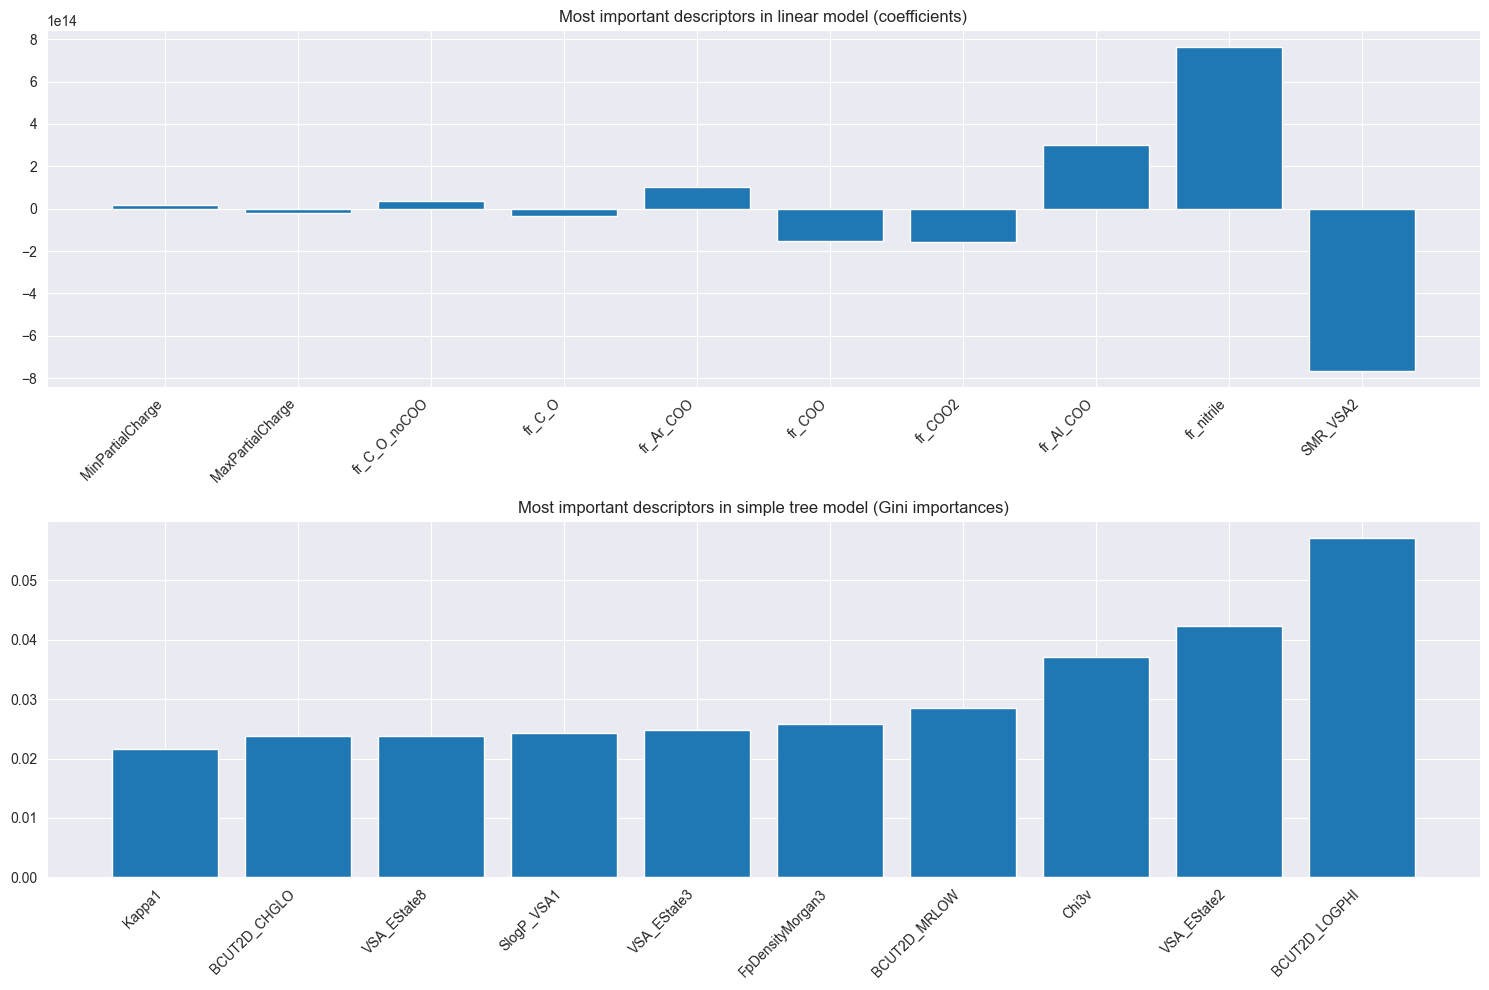

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def create_importance_plot(ax, descriptors, importances, caption):

    important_indices = np.argsort(np.abs(importances))[-10:]
    labels = np.array(descriptors)[important_indices]
    weights = np.array(importances)[important_indices]

    xlocations = np.arange(len(labels))
    ax.bar(xlocations, weights, align='center')
    ax.set_xticks(xlocations)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_title(caption)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

imp_linear = linear_reg.coef_
create_importance_plot(axes[0], descriptors, imp_linear, "Most important descriptors in linear model (coefficients)")

imp_simple_tree = simple_tree.feature_importances_
create_importance_plot(axes[1], descriptors, imp_simple_tree, "Most important descriptors in simple tree model (Gini importances)")

plt.tight_layout()
plt.show()


/var/folders/s6/r_pqgsz17gl5gwn6hkpp23k40000gn/T/ipykernel_96501/3644439837.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Pearson Correlation (MolLogP):  -0.04473517026972362
Pearson Correlation (LabuteASA):  -0.05945878044409998
Pearson Correlation (HeavyAtomCount):  -0.05867671117770572


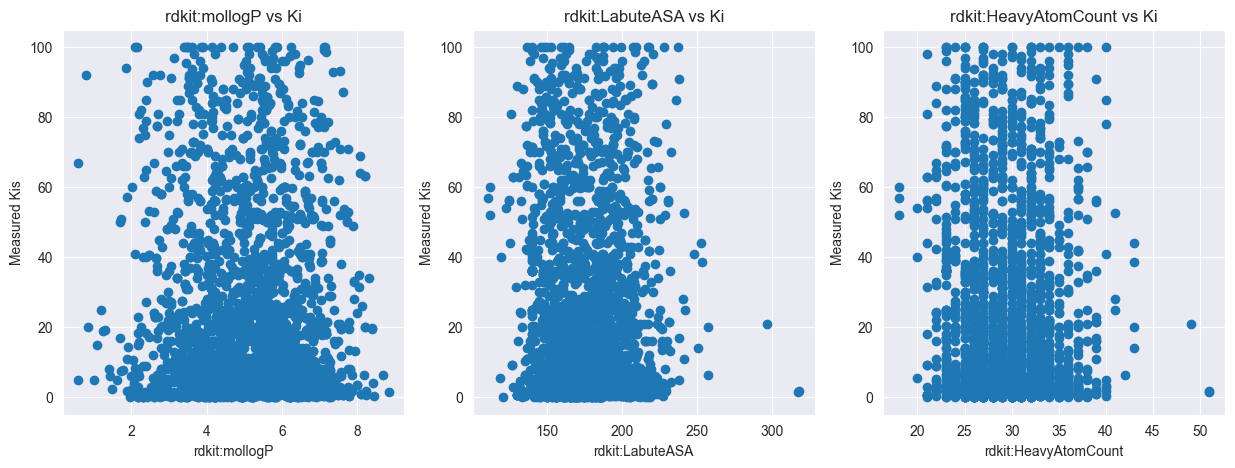

In [142]:
figure,(ax1,ax2,ax3) = pyplot.subplots(1,3)
figure.set_size_inches(15,5)

#inspect logP contribution
from scipy.stats.stats import pearsonr
ind = descriptors.index('MolLogP')
logP = [d[ind] for d in trainSet['Descriptors']]
ax1.scatter(logP,trainSet['Ki'])
ax1.set_title('rdkit:mollogP vs Ki')
ax1.set_xlabel('rdkit:mollogP')
ax1.set_ylabel('Measured Kis')

ax2.scatter([d[descriptors.index('LabuteASA')] for d in trainSet['Descriptors']],trainSet['Ki'])
ax2.set_title('rdkit:LabuteASA vs Ki')
ax2.set_xlabel('rdkit:LabuteASA')
ax2.set_ylabel('Measured Kis')

ax3.scatter([d[descriptors.index('HeavyAtomCount')] for d in trainSet['Descriptors']],trainSet['Ki'])
ax3.set_title('rdkit:HeavyAtomCount vs Ki')
ax3.set_xlabel('rdkit:HeavyAtomCount')
ax3.set_ylabel('Measured Kis')

print('Pearson Correlation (MolLogP): ',pearsonr(logP,trainSet['Ki'])[0])
print('Pearson Correlation (LabuteASA): ',pearsonr([d[descriptors.index('LabuteASA')] for d in trainSet['Descriptors']],trainSet['Ki'])[0])
print('Pearson Correlation (HeavyAtomCount): ',pearsonr([d[descriptors.index('HeavyAtomCount')] for d in trainSet['Descriptors']],trainSet['Ki'])[0])